In [2]:
import pygeoda
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [7]:
gdfjoined = gpd.read_file( r"/home/jovyan/exported_data/jupitor/exported_data/states_sheldus_all.shp")
print( gdfjoined.head() )

,STATE,STATEABBRV,COUNTY,COUNTYFIPS,STCOFIPS,POPULATION,BUILDVALUE,AGRIVALUE,SOVI_SCORE,RESL_VALUE,...,HAtotal,HAcount,PAcount,SBAcount,SBAProjcou,SBAapprove,HazardCoun,x,y,geometry
0,Alabama,AL,Autauga,001,01001,58764,9.123274e+09,24613998.0,51.299999,2.604995,...,7.687544e+06,4.0,0.0,44.0,6.0,1.160600e+06,56.0,-86.642759,32.534932,"POLYGON ((-86.41284 32.63589, -86.41279 32.625..."
1,Alabama,AL,Baldwin,003,01003,231365,4.596848e+10,138089013.0,31.030001,2.745075,...,9.947442e+08,34.0,0.0,1634.0,35.0,1.577607e+09,146.0,-87.723352,30.736470,"MULTIPOLYGON (((-87.92666 30.66002, -87.92688 ..."
2,Alabama,AL,Barbour,005,01005,25160,4.847697e+09,121075758.0,99.269997,2.383568,...,2.175617e+05,2.0,0.0,19.0,2.0,1.048000e+05,40.0,-85.393206,31.869615,"POLYGON ((-85.25954 32.13837, -85.25882 32.138..."
3,Alabama,AL,Bibb,007,01007,22239,3.146947e+09,4819356.0,80.779999,2.471525,...,2.454976e+07,4.0,0.0,55.0,4.0,4.280200e+06,41.0,-87.126450,32.998655,"POLYGON ((-87.02581 33.21717, -87.02573 33.209..."
4,Alabama,AL,Blount,009,01009,58992,7.815620e+09,278570859.0,51.369999,2.488382,...,5.337763e+07,4.0,0.0,65.0,7.0,1.391430e+07,70.0,-86.567381,33.980880,"POLYGON ((-86.44414 34.25913, -86.44434 34.256..."


In [8]:

gdfjoined['totalAssist'] = gdfjoined['HMAprojAmo']  + gdfjoined['PAprojectA'] + gdfjoined['PDMprojAmo'] + gdfjoined['HAtotal'] + gdfjoined['SBAapprove'] 
gdfjoined['totalAssis2'] = gdfjoined['HMAprojAmo']  + gdfjoined['PAprojectA'] + gdfjoined['PDMprojAmo'] + gdfjoined['HAtotal']

gdfjoined['totalDamage'] = gdfjoined['CropDmg'] + gdfjoined['PropertyDm'] 
gdfjoined['DamageSOVI']  = gdfjoined['HazardCoun'] * gdfjoined['SOVI_SCORE'] 

guerry = pygeoda.open(gdfjoined)


In [9]:
queen_w = pygeoda.queen_weights( guerry )

In [10]:
gdfjoined.columns
#guerry

Index(['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'RESL_VALUE', 'fips', 'index',
       'HMAprojAmo', 'AdminCostA', 'NumfinalPr', 'CropDmg', 'CropDmg(AD',
       'CropDmgPer', 'PropertyDm', 'Property_1', 'Property_2', 'Injuries',
       'InjuriesPe', 'Fatalities', 'Fataliti_1', 'Duration_D', 'PAprojectA',
       'PDMprojAmo', 'PDMcount', 'PDMNumfina', 'HMAcount', 'HAtotal',
       'HAcount', 'PAcount', 'SBAcount', 'SBAProjcou', 'SBAapprove',
       'HazardCoun', 'x', 'y', 'geometry', 'totalAssist', 'totalAssis2',
       'totalDamage', 'DamageSOVI'],
      dtype='object')

In [11]:
lisa = pygeoda.local_moran(queen_w, guerry['PropertyDm'])
len( lisa.lisa_values() )

3108

In [12]:
data1 = guerry['totalDamage']
data2 = guerry['totalAssis2']
nm = pygeoda.local_bimoran(queen_w, data1, data2)

In [74]:
#nm.lisa_values()

In [13]:
data1 = gdfjoined[ ['totalAssist','totalDamage','DamageSOVI', 'geometry' ] ]
print( data1.columns )
print( gdfjoined.columns)

Index(['totalAssist', 'totalDamage', 'DamageSOVI', 'geometry'], dtype='object')
Index(['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'RESL_VALUE', 'fips', 'index',
       'HMAprojAmo', 'AdminCostA', 'NumfinalPr', 'CropDmg', 'CropDmg(AD',
       'CropDmgPer', 'PropertyDm', 'Property_1', 'Property_2', 'Injuries',
       'InjuriesPe', 'Fatalities', 'Fataliti_1', 'Duration_D', 'PAprojectA',
       'PDMprojAmo', 'PDMcount', 'PDMNumfina', 'HMAcount', 'HAtotal',
       'HAcount', 'PAcount', 'SBAcount', 'SBAProjcou', 'SBAapprove',
       'HazardCoun', 'x', 'y', 'geometry', 'totalAssist', 'totalAssis2',
       'totalDamage', 'DamageSOVI'],
      dtype='object')


In [14]:
guerry1 = pygeoda.open( data1 )
print( guerry1 )


geoda object:
	 Number of observations: 3108
	 Number of fields: 4
	 Geometry type(s): ('MultiPolygon', 'Polygon')
             field name:      field type (numpy.dtype):
             totalAssist                        float64
             totalDamage                        float64
              DamageSOVI                        float64
                geometry                       geometry



In [15]:

queen_w1 = pygeoda.queen_weights( guerry1 )
#guerry1[['totalAssist'], ['totalDamage'], ['DamageSOVI' ] ]

In [16]:

nm = pygeoda.local_multigeary(queen_w1, guerry1[['totalAssist','totalDamage','DamageSOVI' ] ])

In [17]:
list( nm.lisa_values() )

[0.0615035018968055,
 2.116301218764239,
 0.17072402253442134,
 0.3056562845010305,
 0.22398982581406454,
 0.09236382139843498,
 0.04209996957449757,
 0.22866450921375245,
 0.3361341231322057,
 1.5219968758821276,
 0.1388902491092399,
 1.6422606921528422,
 0.8140309576182084,
 0.3159413789746078,
 0.5070511179239696,
 0.2165404794449867,
 0.06782256562769079,
 0.1945398050664839,
 0.47295789837101027,
 0.10451524899769805,
 0.09402953793436858,
 0.06216880529618463,
 0.72413437870167,
 0.13948377966227532,
 0.47284169122410985,
 0.12181944338730259,
 1.2706147859610308,
 0.20712130896514067,
 0.1741827885092497,
 0.07885245617585578,
 0.1714395460060355,
 0.14115642222379804,
 0.09070618655820721,
 0.301867450895204,
 0.377940788297878,
 0.17178160829478173,
 1.0946333384989162,
 0.6706757874010525,
 0.2547135642763885,
 0.2217023917488734,
 0.30131212182320927,
 0.11957674419568363,
 0.05403885408781897,
 0.11170492014583311,
 0.13072772799850885,
 0.15510692481520758,
 0.075919483169

In [19]:
pthall      = r"/home/jovyan/exported_data/jupitor/exported_data/county_year_sheldus_all.csv"
pthdeclared = r"/home/jovyan/exported_data/jupitor/exported_data/county_year_sheldus_declared.csv"

county_year_all      = pd.read_csv( pthall )
county_year_declared = pd.read_csv( pthdeclared )


In [20]:
county_year_all.columns

Index(['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'RESL_VALUE', 'geometry',
       'fips', 'key', 'Year', 'index', 'HMAprojAmot', 'AdminCostAmt',
       'NumfinalProp', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days', 'PAprojectAmt',
       'PDMprojAmot', 'PDMcount', 'PDMNumfinalProp', 'HMAcount', 'HAtotal',
       'HAcount', 'PAcount', 'SBAcount', 'SBAProjcount', 'SBAapproved',
       'HazardCount', 'x', 'y'],
      dtype='object')

In [46]:
for yi in county_year_all["Year"].unique():
    county_all_yeari = county_year_all.loc[ county_year_all["Year"]== yi, : ]
    #geometry = [ (xy) for xy in zip(df.Lon, df.Lat)]
    geometryi = gpd.GeoSeries.from_wkt( county_all_yeari['geometry'] )
    county_all_yeari = gpd.GeoDataFrame(county_all_yeari, 
                                        #crs="EPSG:4326", 
                                        geometry= geometryi ) #geometry= county_all_yeari['geometry']
    
    county_all_yeari['totalAssist']  = county_all_yeari['HMAprojAmot']  + county_all_yeari['PAprojectAmt'] + county_all_yeari['PDMprojAmot'] + county_all_yeari['HAtotal'] + county_all_yeari['SBAapproved'] 
    #county_all_yeari['totalAssis2'] = county_all_yeari['HMAprojAmo']  + gdfjoined['PAprojectA'] + gdfjoined['PDMprojAmo'] + gdfjoined['HAtotal']
    county_all_yeari['totalDamage']  = county_all_yeari['CropDmg'] + county_all_yeari['PropertyDmg'] 
    county_all_yeari['CountSOVI']   = county_all_yeari['HazardCount'] * county_all_yeari['SOVI_SCORE'] 

    county_all_yeari['InjurySOVI']   = county_all_yeari['Injuries'] * county_all_yeari['SOVI_SCORE'] 
    county_all_yeari['FataliSOVI']   = county_all_yeari['Fatalities'] * county_all_yeari['SOVI_SCORE'] 

    pthi = "/home/jovyan/exported_data/jupitor/data_year/df_year_all" + str(yi)+ ".shp"
    county_all_yeari.to_file(pthi)
    print(yi)
    


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2001


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2002


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2003


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2004


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2005


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2006


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2007


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2008


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2009


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2010


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2011


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2012


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2013


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2014


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2015


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2016


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2017


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2018


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2019


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2020


/tmp/ipykernel_1511/1203875517.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)


2021


In [52]:
yearlist        = []
gearylist       = []
bimoranlist1    = []
bimoranlist2    = []

processed_dfs   = []

for yi in county_year_all["Year"].unique():
    yearlist.append( yi )
    pthi = "/home/jovyan/exported_data/jupitor/data_year/df_year_all" + str(yi)+ ".shp"
    gdfjoinedi = gpd.read_file( pthi )
    
    guerryi   = pygeoda.open( gdfjoinedi )
    queen_wi  = pygeoda.queen_weights( guerryi )

    nmi_geary = pygeoda.local_multigeary(queen_wi, guerryi[['totalAssis','totalDamag','InjurySOVI' ] ])
    gdfjoinedi['geary'] = list( nmi_geary.lisa_values() )

    gearylist.append( np.mean( list( nmi_geary.lisa_values() ) ) )

    datai1 = guerryi['totalDamag']
    datai2 = guerryi['totalAssis']
    datai3 = guerryi['InjurySOVI']
    nmi_bimoran1 = pygeoda.local_bimoran( queen_wi, datai1, datai2 )
    nmi_bimoran2 = pygeoda.local_bimoran( queen_wi, datai3, datai2 )

    gdfjoinedi['bimoran1'] = list( nmi_bimoran1.lisa_values() )
    gdfjoinedi['bimoran2'] = list( nmi_bimoran2.lisa_values() )

    bimoranlist1.append( np.mean( list( nmi_bimoran1.lisa_values() ) ) )
    bimoranlist2.append( np.mean( list( nmi_bimoran2.lisa_values() ) ) )

    new = gdfjoinedi[['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'fips', 'Year', 'totalDamag', 'totalAssis',
       'PropertyDm', 'Injuries', 'Fatalities', 
       'geary', 'bimoran1', 'bimoran2']].copy()
    processed_dfs.append( new )
    #county_all_yeari.to_file(pthi)

In [45]:
gdfjoinedi.columns

Index(['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'RESL_VALUE', 'fips', 'key',
       'Year', 'index', 'HMAprojAmo', 'AdminCostA', 'NumfinalPr', 'CropDmg',
       'CropDmg(AD', 'CropDmgPer', 'PropertyDm', 'Property_1', 'Property_2',
       'Injuries', 'InjuriesPe', 'Fatalities', 'Fataliti_1', 'Duration_D',
       'PAprojectA', 'PDMprojAmo', 'PDMcount', 'PDMNumfina', 'HMAcount',
       'HAtotal', 'HAcount', 'PAcount', 'SBAcount', 'SBAProjcou', 'SBAapprove',
       'HazardCoun', 'x', 'y', 'totalAssis', 'totalDamag', 'DamageSOVI',
       'geometry'],
      dtype='object')

In [48]:

from functools import reduce
merge_df = reduce(lambda flower, test:    
                  pd.concat( [flower , test],
                             ignore_index= True), processed_dfs)
merge_df.shape

(65268, 19)

In [32]:
pthall = "/home/jovyan/exported_data/jupitor/data_year/lise_county_year.csv"
merge_df.to_csv( pthall , index=False)


/tmp/ipykernel_1511/2378125926.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( np.array(yearlist).astype(int))


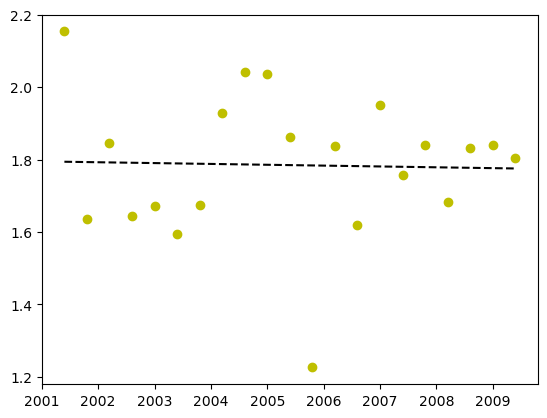

In [64]:
coef = np.polyfit( yearlist, gearylist ,1)
poly1d_fn = np.poly1d(coef) 


fig, ax = plt.subplots()
ax.plot( yearlist, gearylist, 'yo', yearlist, poly1d_fn(yearlist), '--k' )
ax.set_xticklabels( np.array(yearlist).astype(int))
plt.savefig('/home/jovyan/exported_data/results/multi_geary_year.png', dpi=300)

/tmp/ipykernel_1511/2354277348.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( np.array(yearlist).astype(int))


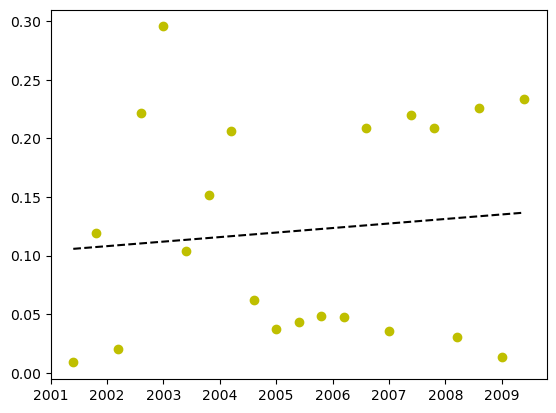

In [66]:
coef2 = np.polyfit( yearlist, bimoranlist1 ,1)
poly2d_fn = np.poly1d(coef2) 


#plt.xlim(2000, 2022)
#plt.ylim(0, 0.3)

fig, ax = plt.subplots()
ax.plot( yearlist, bimoranlist1, 'yo', yearlist, poly2d_fn(yearlist), '--k' )
ax.set_xticklabels( np.array(yearlist).astype(int))
plt.savefig('/home/jovyan/exported_data/results/LocalMoran1_year.png', dpi=300)

/tmp/ipykernel_1511/4016632573.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( np.array(yearlist).astype(int))


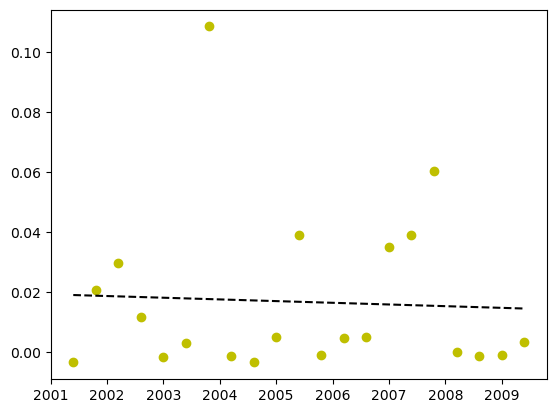

In [67]:
coef3 = np.polyfit( yearlist, bimoranlist2 ,1)
poly3d_fn = np.poly1d(coef3) 

fig, ax = plt.subplots()
ax.plot( yearlist, bimoranlist2, 'yo', yearlist, poly3d_fn(yearlist), '--k' )
ax.set_xticklabels( np.array(yearlist).astype(int))
plt.savefig('/home/jovyan/exported_data/results/LocalMoran2_year.png', dpi=300)